In [1]:
## import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist  # call hist, otherwise np.histogram
import matplotlib.pyplot as plt

import histogram_module
import dist_module
import match_module
import rpc_module

In [2]:
## Find best match (Question 3.a)

with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

eval_dist_type = 'intersect';
eval_hist_type = 'rg';
eval_num_bins = 30;

## 3.a : Show neigbours and find best match
The show_neighbours() takes all the input images and their corresponding images. The distance formulae implemented in 2.c are used to compute the similarities in the images. 
The output of the function D is of size (no of model images * no of query images). In this specific example 89*89. Each cell [i,j] represents the distance between ith result image and jth query images.
The best match is the one that has the least distance from the model image.

In [3]:
[best_match, D] = match_module.find_best_match(model_images, query_images, eval_dist_type, eval_hist_type, eval_num_bins)
print("Shape of D: "+ str(np.shape(D)))
print("Shape of Best Match: "+ str(np.shape(best_match)))

Shape of D: (89, 89)
Shape of Best Match: (89,)


In [4]:
print("Distance formula used : %s "% (eval_dist_type))
print("Histrograms formula used : %s "% (eval_hist_type))
print("No of bins used : %i "% (eval_num_bins))


Distance formula used : intersect 
Histrograms formula used : rg 
No of bins used : 30 


#### Additionally 5 sample images are taken from model_images and their best_match are plotted

Distance formula used : intersect 
Histrograms formula used : rg 
No of bins used : 30 


<Figure size 432x288 with 0 Axes>

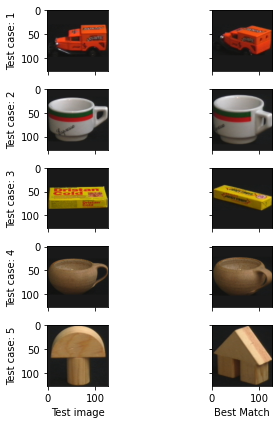

In [5]:
print("Distance formula used : %s "% (eval_dist_type))
print("Histrograms formula used : %s "% (eval_hist_type))
print("No of bins used : %i "% (eval_num_bins))
plt.figure()
fig, axes2d = plt.subplots(nrows=5, ncols=2,sharex=True, sharey=True,figsize=(6,6))
for i, row in enumerate(axes2d):
    for j, cell in enumerate(row):
        if(j==0):
            cell.imshow(np.array(Image.open(model_images[i])), vmin=0, vmax=255)
            if i == len(axes2d) - 1:
                cell.set_xlabel("Test image")
        else:
            cell.imshow(np.array(Image.open(query_images[best_match[i]])), vmin=0, vmax=255 )  
            if i == len(axes2d) - 1:
                cell.set_xlabel("Best Match")
        if j == 0:
            cell.set_ylabel("Test case: {0:d}".format(i + 1))
plt.tight_layout()
plt.show()

## 3.b Five Nearest neighbors
As required neighbours are calculated from the three given images. Using the D matrix calculated by find_match_module is used to find the distances. For each given image, top 5 candidate images based on their similiarity are plotted.

<Figure size 432x288 with 0 Axes>

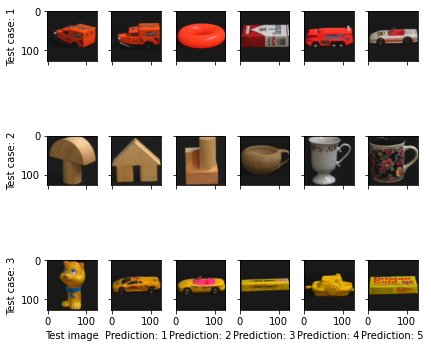

In [6]:
## visualize nearest neighbors (Question 3.b)
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
match_module.show_neighbors(model_images, query_images_vis, eval_dist_type, eval_hist_type, eval_num_bins)

In [7]:
print("Distance formula used : %s "% (eval_dist_type))
print("Histrograms formula used : %s "% (eval_hist_type))
print("No of bins used : %i "% (eval_num_bins))


Distance formula used : intersect 
Histrograms formula used : rg 
No of bins used : 30 


## 3.c Recognition percentage

The recognition percentage is calculated for all distance formulae and histograms.

In [8]:
print('distance functions:')
distance_types = ['l2', 'intersect', 'chi2']
print(distance_types)
print('\n')

print('histogram types:')
hist_types = [ 'rgb', 'rg', 'dxdy','grayscale']
print(hist_types)
print('\n')


distance functions:
['l2', 'intersect', 'chi2']


histogram types:
['rgb', 'rg', 'dxdy', 'grayscale']




In [9]:
## compute recognition percentage (Question 3.c)
# import ipdb; ipdb.set_trace()
print("Distance formula used : %s \n"% (eval_dist_type))
print("Histrograms formula used : %s \n"% (eval_hist_type))
print("No of bins used : %i \n"% (eval_num_bins))
num_correct = sum( best_match == range(len(query_images)) )
print('number of correct matches: %d \n'% (num_correct))
print('total sample: %d \n'% (len(query_images)))
print('recognition percentage: %f\n'% (1.0 * num_correct / len(query_images)))

Distance formula used : intersect 

Histrograms formula used : rg 

No of bins used : 30 

number of correct matches: 68 

total sample: 89 

recognition percentage: 0.764045



In [10]:
bins=np.array([5,30,70])
print(bins)
Correct_Match_Table = np.zeros( (len(distance_types), len(hist_types),len(bins)) )

[ 5 30 70]


In [ ]:
for didx in range(len(distance_types)):
  for hidx in range(len(hist_types)):
    for x in range(len(bins)): 
      print(distance_types[didx], hist_types[hidx], bins[x])  
      [best_match, D] = match_module.find_best_match(model_images, query_images, distance_types[didx], hist_types[hidx], int(bins[x]))
#       [best_match, D] = match_module.find_best_match(model_images, query_images, 'intersect', 'rg', 30)
      num_correct = sum( best_match == range(len(query_images)) )
      print('number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(query_images)))
      Correct_Match_Table[didx, hidx,x] =  num_correct / len(query_images)
      print('\n')


l2 rgb 5
number of correct matches: 62 (0.696629)



l2 rgb 30
number of correct matches: 33 (0.370787)



l2 rgb 70


In [ ]:
#### np.shape(Correct_Match_Table)
Correct_Match_Table
np.savetxt("Correct_Match_Table.csv", Correct_Match_Table, delimiter=",")

In [ ]:
plt.figure()
fig, axes2d = plt.subplots(nrows=5, ncols=len(distance_types),sharex=True, sharey=True,figsize=(6,6))
for i, row in enumerate(axes2d):
    for j, cell in enumerate(row):
        if(j==0):
            cell.imshow(np.array(Image.open(model_images[i])), vmin=0, vmax=255)
            if i == len(axes2d) - 1:
                cell.set_xlabel("Test image")
        else:
            cell.imshow(np.array(Image.open(query_images[best_match[i]])), vmin=0, vmax=255 )  
            if i == len(axes2d) - 1:
                cell.set_xlabel("Best Match")
        if j == 0:
            cell.set_ylabel("Test case: {0:d}".format(i + 1))
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[[30, 25, 50, 20],
[40, 23, 51, 17]],
[[35, 22, 45, 19],
[40, 23, 51, 17]]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [ ]:
## plot recall_precision curves (Question 4)

with open('model.txt') as fp:
    model_images = fp.readlines()
model_images = [x.strip() for x in model_images] 

with open('query.txt') as fp:
    query_images = fp.readlines()
query_images = [x.strip() for x in query_images] 

eval_num_bins = 20;


plt.figure()
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rg', eval_num_bins, ['r', 'g', 'b'])
plt.title('RG histograms')
plt.show()


plt.figure()
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'rgb', eval_num_bins / 2, ['r', 'g', 'b'])
plt.title('RGB histograms')
plt.show()

plt.figure()
rpc_module.compare_dist_rpc(model_images, query_images, ['chi2', 'intersect', 'l2'], 'dxdy', eval_num_bins, ['r', 'g', 'b'])
plt.title('dx/dy histograms')
plt.show()